# SVM for classification

Load IRIS dataset, check its contents:


In [25]:
import numpy as np
from sklearn.datasets import load_iris
iris=load_iris()
iris.feature_names
print(iris.feature_names)
print(iris.data[0:5,:])
print(iris.target[0:5])
#print(iris.data)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]


Split data into training and testing parts:

In [26]:
from sklearn.model_selection import train_test_split
X = iris.data[:, :2]
y=iris.target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(120, 2)
(30, 2)


Use a Support Vector Machine for classification:


In [27]:
from sklearn.svm import SVC
SVMmodel=SVC(kernel='linear')
SVMmodel.fit(X_train,y_train)
SVMmodel.get_params()
SVMmodel.score(X_test,y_test)

0.8333333333333334

Let's explore more now.

*   Choose only first two features (columns) of iris.data
*   SVM is in its basic form a 2-class classifier, so eliminate iris.target =2 from the data



In [28]:
iris = load_iris()
X = iris.data[:, :2]
y = iris.target

X, y = X[y < 2], y[y < 2]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# accuracy
print("Model accuracy: ", svm_model.score(X_test, y_test))

print(svm_model.coef_)

Model accuracy:  1.0
[[ 2.22543629 -2.22255231]]


Plot scatterplots of targets 0 and 1 and check the separability of the classes:

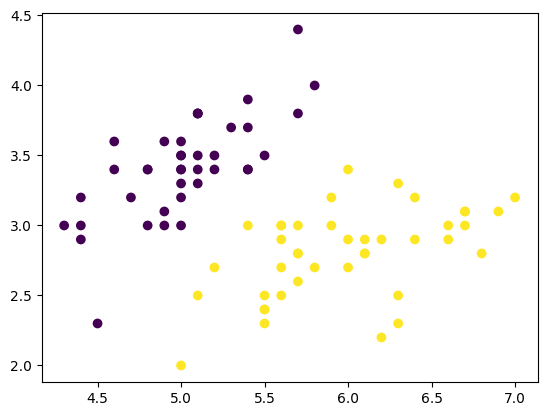

In [29]:
import matplotlib.pyplot as plt
plt.scatter(X_train[:,0], X_train[:,1], c=y_train)
plt.show()


Train and test the SVM classifier, play with regularization parameter C (either use the default value or try e.g. 200)

In [30]:
from sklearn.svm import SVC

# Train and test the SVM classifier with C=200
svm_model_C200 = SVC(kernel='linear', C=200)
svm_model_C200.fit(X_train, y_train)

# Accuracy with C=200
print("Model accuracy with C=200: ", svm_model_C200.score(X_test, y_test))

Model accuracy with C=200:  1.0


Show support vectors in the 2D plot, plot the decision line from equation [w0 w1]*[x0 x1] + b = 0:

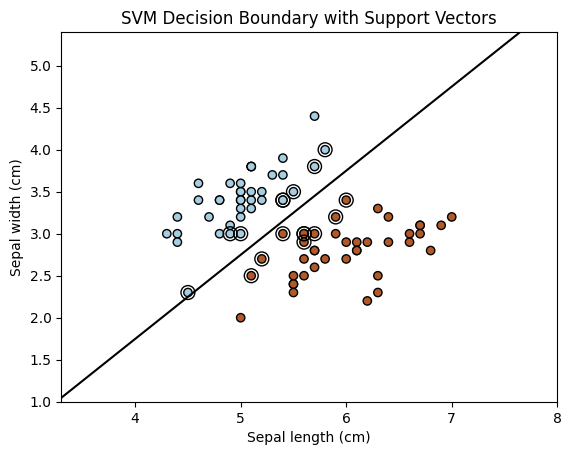

In [37]:
import matplotlib.pyplot as plt
import numpy as np

# Plot the training data
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired, edgecolors='k')

# Get support vectors, coefficients, and intercept from the svm_model
supvectors = svm_model.support_vectors_
W = svm_model.coef_[0]
b = svm_model.intercept_[0]

# Plot the support vectors
plt.scatter(supvectors[:, 0], supvectors[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')

# Calculate the decision boundary line
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx = np.linspace(x_min, x_max, 100)
yy = (-W[0] * xx - b) / W[1]

# Plot the decision line
plt.plot(xx, yy, 'k-')

plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.title('SVM Decision Boundary with Support Vectors')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()

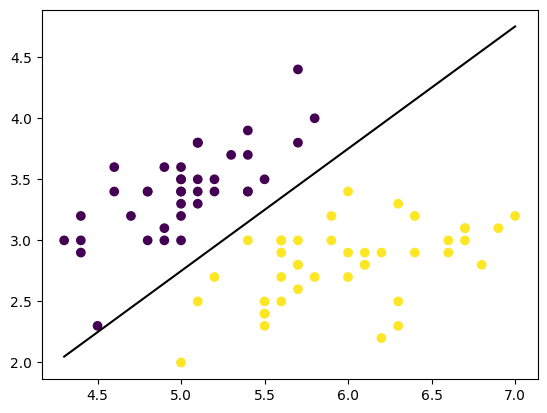

In [32]:
supvectors=SVMmodel.support_vectors_
# Plot the support vectors here


#Separating line coefficients:
W=svm_model.coef_
b=svm_model.intercept_

#print(W)
#print(b)
x1 = np.linspace(np.min(X[:,0]), np.max(X[:,0]), 100)

# plot the line
plt.plot(x1, -((W[0,0])*x1 + b)/W[0,1], 'k-')
plt.scatter(X_train[:,0], X_train[:,1], c=y_train)
#plt.show


# Anomaly detection via SVM

Import one-class SVM and generate data (Gaussian blobs in 2D-plane):

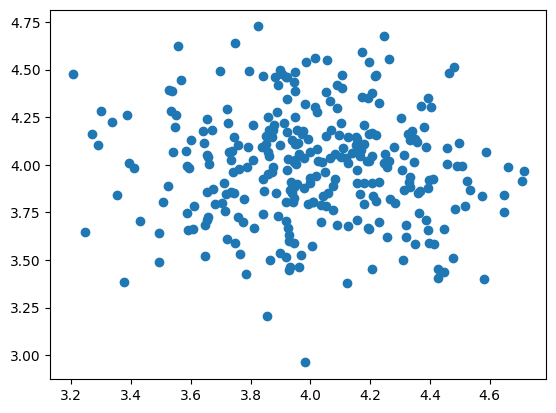

In [33]:
from sklearn.svm import OneClassSVM
from sklearn.datasets import make_blobs
from numpy import quantile, where, random

random.seed(11)
x, _ = make_blobs(n_samples=300, centers=1, cluster_std=.3, center_box=(4, 4))

plt.scatter(x[:,0], x[:,1])
plt.show()



Train one-class SVM and plot the outliers (outputs of prediction being equal to -1)

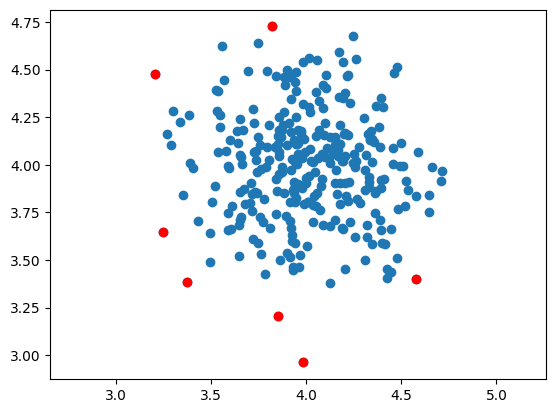

In [34]:
SVMmodelOne = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.03)


SVMmodelOne.fit(x)
pred = SVMmodelOne.predict(x)
anom_index = where(pred==-1)
values = x[anom_index]

plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='red')
plt.axis('equal')
plt.show()



Plot the support vectors:

What if we want to have a control what is outlier? Use e.g. 5% "quantile" to mark the outliers. Every point with lower score than threshold will be an outlier.

8.987833799021839


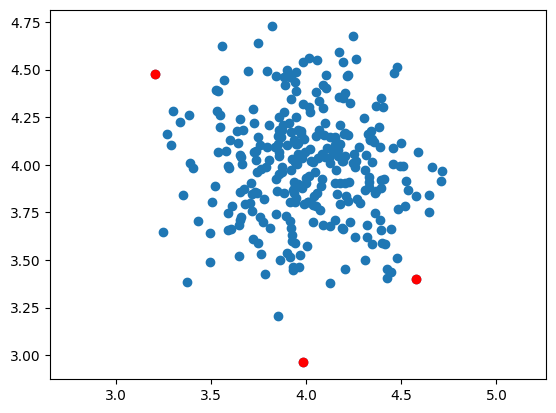

In [35]:
scores = SVMmodelOne.score_samples(x)

thresh = quantile(scores, 0.01)
print(thresh)
index = where(scores<=thresh)
values = x[index]

plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='red')
plt.axis('equal')
plt.show()